# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Wahbah Azzuhaili
- **Email:** zzuhaili123@gmail.com
- **ID Dicoding:** zzuhaili


Keterangan : Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

## Menentukan Pertanyaaan Bisnis
1. Pada jam berapa paling banyak penyewa sepeda secara rata-rata?
2. Apa pengaruh cuaca pada perilaku penyewa?
3. Apa pengaruh musim pada perilaku penyewa?
4. Apa pengaruh hari libur, kerja, dan bagaimana perbandingan banyaknya penyewa sepeda setiap harinya?

# Data Wragling

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Gathering and Assessing Data

### day_csv

In [11]:
# membuat tabel day
day_df = pd.read_csv("day.csv")
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [12]:
# assesing data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [13]:
# cek duplicated data
print(day_df.duplicated().sum())
#tidak ada data duplikat

0


In [14]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### hour_df

In [36]:
hour_df = pd.read_csv("hour.csv")
hour_df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [16]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [17]:
print(hour_df.duplicated().sum())

0


In [18]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Resume
1. Data tidak ada yang kosong maupun duplicate
2. Semua nilai maksimum, minimum, mean tampak masuk akal dan akurat
3. Perlu mengubah datetime menjadi data date
4. Beberapa data categorikal masih belum berupa categorikal

## Cleaning Data

### hour_csv

In [19]:
# Mengubaha tipe data ke categorical
hour_df['season'] = hour_df.season.astype('category')
hour_df['yr'] = hour_df.yr.astype('category')
hour_df['mnth'] = hour_df.mnth.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weathersit'] = hour_df.weathersit.astype('category')

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [20]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     17379 non-null  int64   
 1   dteday      17379 non-null  object  
 2   season      17379 non-null  category
 3   yr          17379 non-null  category
 4   mnth        17379 non-null  category
 5   hr          17379 non-null  int64   
 6   holiday     17379 non-null  category
 7   weekday     17379 non-null  category
 8   workingday  17379 non-null  category
 9   weathersit  17379 non-null  category
 10  temp        17379 non-null  float64 
 11  atemp       17379 non-null  float64 
 12  hum         17379 non-null  float64 
 13  windspeed   17379 non-null  float64 
 14  casual      17379 non-null  int64   
 15  registered  17379 non-null  int64   
 16  cnt         17379 non-null  int64   
dtypes: category(7), float64(4), int64(5), object(1)
memory usage: 1.4+ MB


### day_csv

In [21]:
# Mengubah tipe data ke datetime
day_df['dteday'] = pd.to_datetime(day_df.dteday)

# Mengubaha tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['yr'] = day_df.yr.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [22]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

### Perubahan beberapa deskripsi pada tabel

In [23]:
# Mengubah angka menjadi keterangan day_df
day_df['mnth'] = day_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})


In [24]:
# Mengubah angka menjadi keterangan hour_df
hour_df['mnth'] = hour_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
hour_df['season'] = hour_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
hour_df['weathersit'] = hour_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})


# Explanatory Data Analysis (EDA)

## hour_csv

In [25]:
# pengelompokkan data berdasarkan jam berapa pengguna menyewa
hour_df.groupby(by='hr').agg({
    'cnt' : ['max', 'min', 'mean', 'sum']
})

cnt                        
    max min        mean     sum
hr                             
0   283   2   53.898072   39130
1   168   1   33.375691   24164
2   132   1   22.869930   16352
3    79   1   11.727403    8174
4    28   1    6.352941    4428
5    66   1   19.889819   14261
6   213   1   76.044138   55132
7   596   1  212.064649  154171
8   839   5  359.011004  261001
9   426  14  219.309491  159438
10  539   8  173.668501  126257
11  663  10  208.143054  151320
12  776   3  253.315934  184414
13  760  11  253.661180  184919
14  750  12  240.949246  175652
15  750   7  251.233196  183149
16  783  11  311.983562  227748
17  976  15  461.452055  336860
18  977  23  425.510989  309772
19  743  11  311.523352  226789
20  567  11  226.030220  164550
21  584   6  172.314560  125445
22  502   9  131.335165   95612
23  256   2   87.831044   63941

In [26]:
# pengelompokkan data berdasarkan jam berapa pengguna menyewa
day_df.groupby(by='mnth').agg({
    'cnt' : ['max', 'min', 'mean', 'sum']
})

cnt                           
       max   min         mean     sum
mnth                                 
Jan   4521   431  2176.338710  134933
Feb   5062  1005  2655.298246  151352
Mar   8362   605  3692.258065  228920
Apr   7460   795  4484.900000  269094
May   8294  2633  5349.774194  331686
Jun   8120  3767  5772.366667  346342
Jul   8173  3285  5563.677419  344948
Aug   7865  1115  5664.419355  351194
Sep   8714  1842  5766.516667  345991
Oct   8156    22  5199.225806  322352
Nov   6852  1495  4247.183333  254831
Dec   6606   441  3403.806452  211036

In [27]:
day_df.groupby(by='weathersit').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
                      max  min         mean      sum
weathersit                                          
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Misty/Cloudy         8362  605  4035.862348   996858
Light Snow/Rain      4639   22  1803.285714    37869

In [28]:
day_df.groupby(by='holiday').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

In [51]:
day_df.groupby(by='weekday').agg({
    'cnt':['max','min','mean', 'std']
})

cnt                                
          max   min         mean          std
weekday                                      
Sun      8227   605  4228.828571  1872.496629
Mon      7525    22  4338.123810  1793.074013
Tue      7767   683  4510.663462  1826.911642
Wed      8173   441  4548.538462  2038.095884
Thu      7804   431  4667.259615  1939.433317
Fri      8362  1167  4690.288462  1874.624870
Sat      8714   627  4550.542857  2196.693009

In [30]:
day_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': ['max', 'min', 'mean']
})

casual   registered   cnt                   
               mean         mean   max   min         mean
season                                                   
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Winter   729.112360  3999.050562  8555    22  4728.162921

In [31]:
day_df.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'hum': ['max', 'min', 'mean'],
    'cnt': ['max', 'min', 'mean']
})

temp                         atemp                           hum  \
             max       min      mean       max       min      mean       max   
season                                                                         
Spring  0.572500  0.059130  0.297748  0.548617  0.079070  0.296914  0.948261   
Summer  0.808333  0.253043  0.544405  0.757579  0.250339  0.520307  0.922500   
Fall    0.861667  0.469167  0.706309  0.840896  0.242400  0.655898  0.939565   
Winter  0.657500  0.220833  0.422906  0.607975  0.227913  0.415539  0.972500   

                             cnt                     
             min      mean   max   min         mean  
season                                               
Spring  0.000000  0.582903  7836   431  2604.132597  
Summer  0.254167  0.626948  8362   795  4992.331522  
Fall    0.360000  0.633482  8714  1115  5644.303191  
Winter  0.333478  0.668719  8555    22  4728.162921

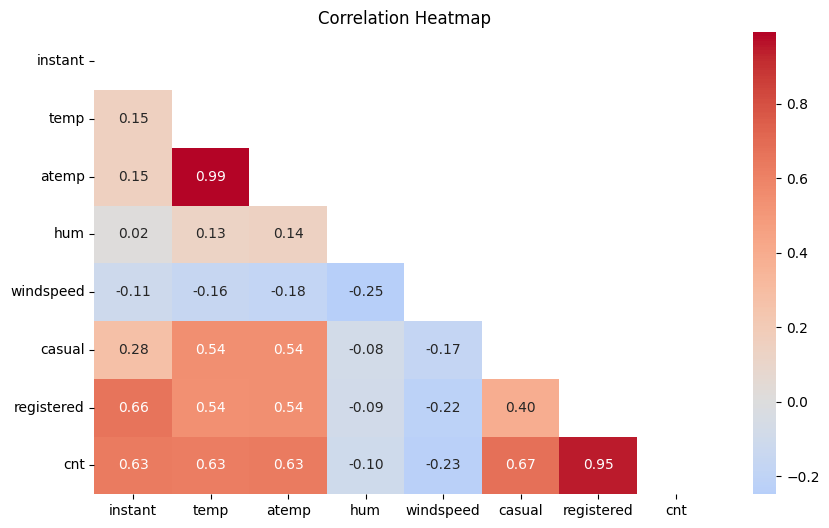

In [32]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Perlu menggarisbawahi beberapa korelasi yang kuat seperti cnt dan instant, temp, dan atemp, ini sangat berpengaruh satu sama lain. Kemudian humidity dan windspeed ternyata tidak terlalu berpengaruh terhadap penyewa.

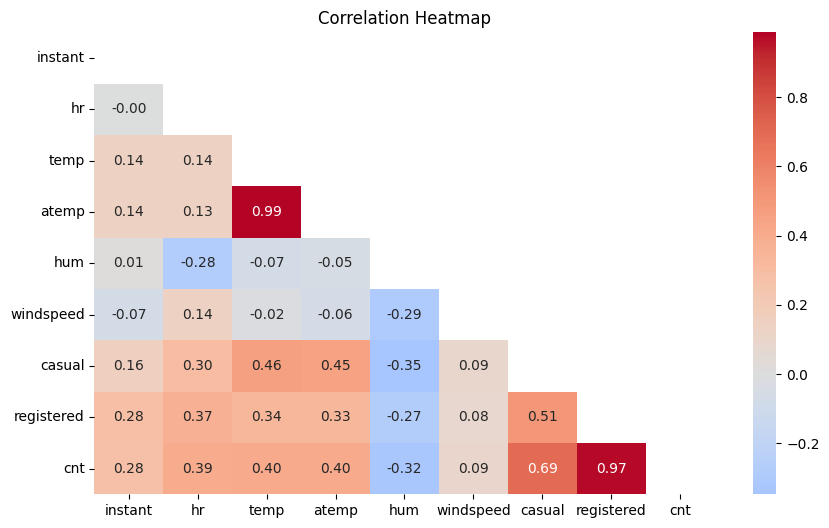

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = hour_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Disini cnt hrm temp, atemp, cukup berkorelasi. Untuk humidity dan windspeed sama spt sebelumnya tidak terlalu berkorelasi satu sama lain dengan cnt

# Visualization & Explanatory Analysis

## Pertanyaan 1

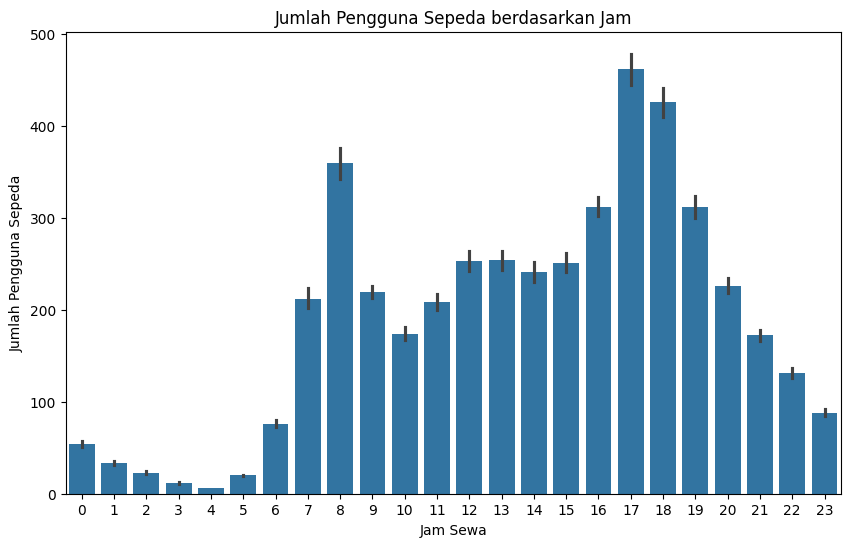

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='hr',
    y='cnt',
    data=hour_df)

plt.title('Jumlah Pengguna Sepeda berdasarkan Jam')
plt.xlabel('Jam Sewa')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

Disini terlihat bahwa rata-rata orang menyewa paling banyak pada sore hari, puncaknya pada pukul 17.00. Paling sedikit adalah ketikan malam menuju subuh. Di pagi hari jam 8 juga terjadi lonjakan yang sangat signifikan. Ini mengindikasikan persewaan dapat dibuka sebelum jam 8 pagi dan sesudah subuh sekitar jam 6 pagi.

## Pertanyaan 2

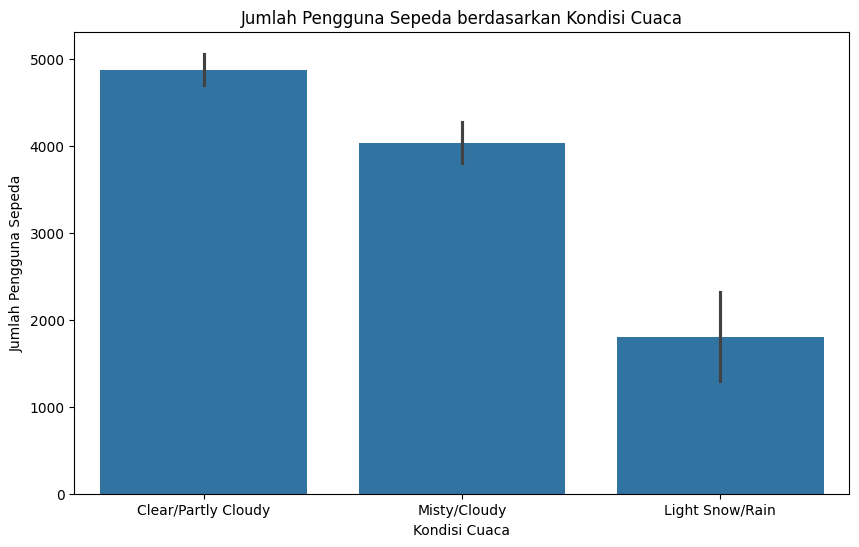

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weathersit',
    y='cnt',
    data=day_df)

plt.title('Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

Terlihat jelas penyewa lebih banyak ketika harinya cerah dan berkurang ketika mendung atau berkabut. Menurun drstis ketika hujan.

## Pertanyaan 3

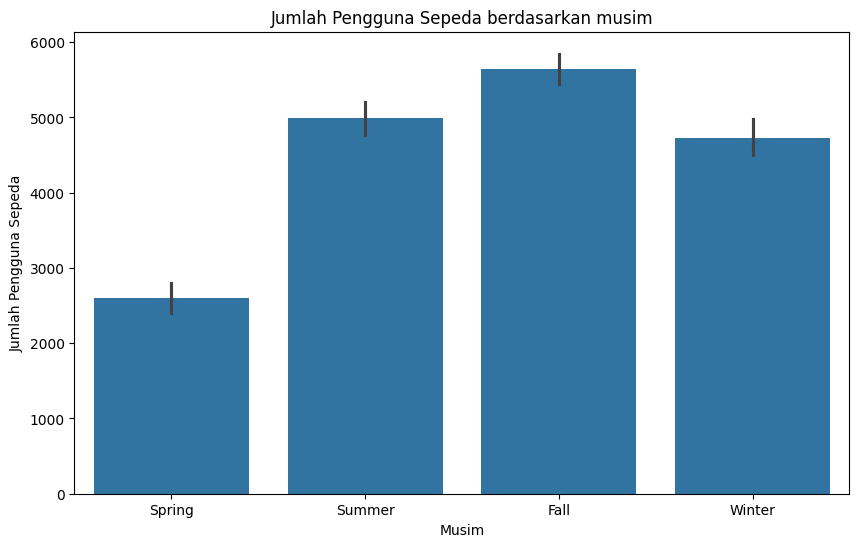

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='season',
    y='cnt',
    data=day_df)

plt.title('Jumlah Pengguna Sepeda berdasarkan musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

Frekuensi penyewa paling tinggi saat musim gugur ternyata dan masih tinggi di musim dingin yang sebenarnya mungkin masih ada salju. Yang paling rendah berada pada musim semi. Ini menarik mengingat sebelumnya lebih sedikit penyewa saat hujan salju. Tapi pada musim tersebut total penyewa dalam musim tersebut masih banyak.

## Pertanyaan 4

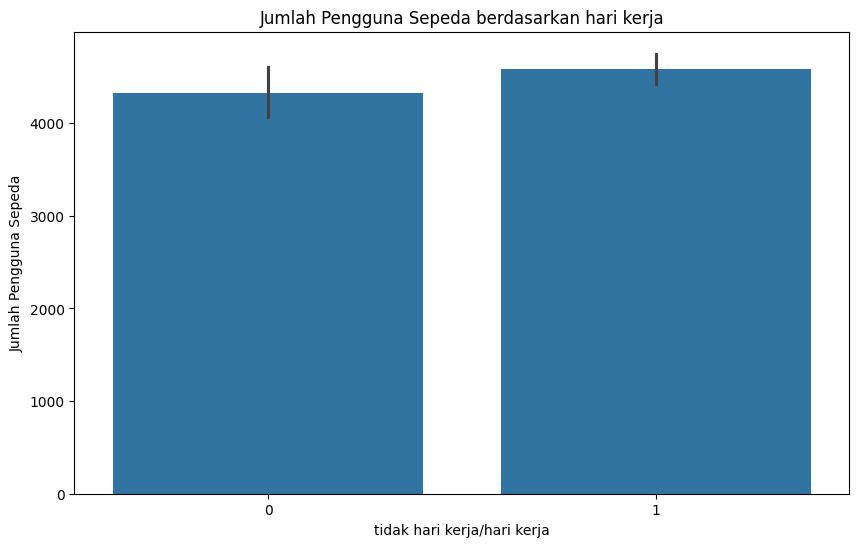

In [48]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='workingday',
    y='cnt',
    data=day_df)

plt.title('Jumlah Pengguna Sepeda berdasarkan hari kerja')
plt.xlabel('tidak hari kerja/hari kerja')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

Ternyata pada hari kerja lebih banyak penyewa dari pada bukan hari kerja

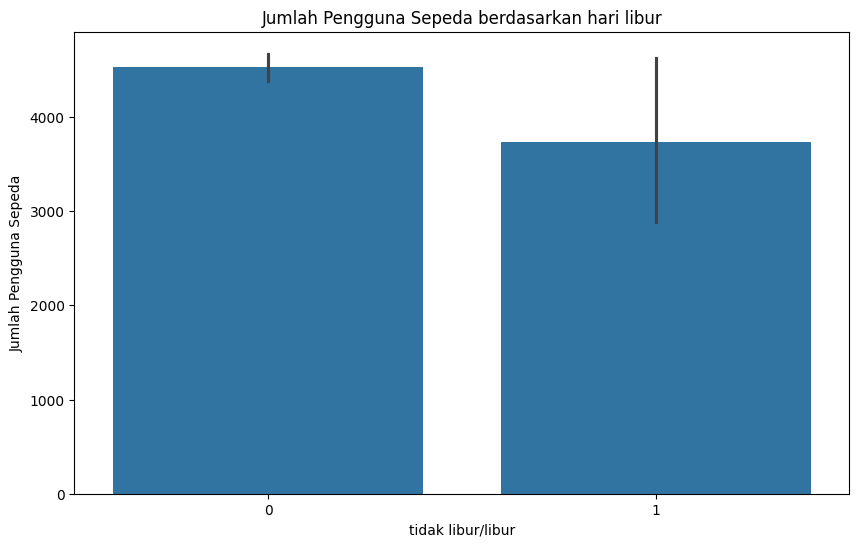

In [49]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='holiday',
    y='cnt',
    data=day_df)

plt.title('Jumlah Pengguna Sepeda berdasarkan hari libur')
plt.xlabel('tidak libur/libur')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

Berdasarkan hsil sebelumnya memang hari kerja lebih banyak penyewa daripada hari libur maka data ini masuk akal. Ketika libur, lebih sedikit penyewa daripada hari kerja

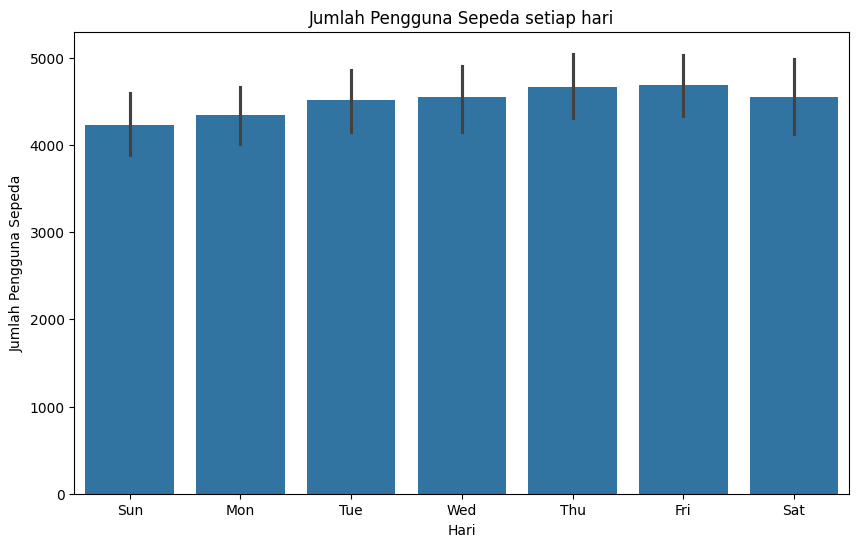

In [50]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weekday',
    y='cnt',
    data=day_df)

plt.title('Jumlah Pengguna Sepeda setiap hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

Hari paling sedikit penyewa adalah hari Minggu dan paling banyak pada hari Jum'at. Tapi dari keseluruhan tidak terlalu jauh berbeda antara hari satu dan hari lainnya.

# Kesimpulan
1. Rata-rata orang menyewa paling banyak pada sore hari, puncaknya pada pukul 17.00. Paling sedikit adalah ketikan malam menuju subuh. Di pagi hari jam 8 juga terjadi lonjakan yang sangat signifikan.
2. Penyewa lebih banyak menyewa sepeda ketika harinya cerah dan berkurang ketika mendung atau berkabut. Menurun drstis ketika hujan.
3. Frekuensi penyewa yang paling tinggi adalah saat saat musim gugur dan pada musim dinginpun penyewa masih banyak yang sebenarnya mungkin masih ada salju. Yang paling rendah berada pada musim semi. Ini menarik mengingat sebelumnya lebih sedikit penyewa saat hujan salju. Tapi pada musim tersebut total penyewa dalam musim tersebut masih banyak.
4. Ternyata pada hari kerja lebih banyak penyewa dari pada bukan hari kerja. Berdasarkan hasil sebelumnya memang hari kerja lebih banyak penyewa daripada hari libur maka data ini masuk akal. Ketika libur, lebih sedikit penyewa daripada hari kerja. Hari paling sedikit penyewa adalah hari Minggu dan paling banyak pada hari Jum'at. Tapi dari keseluruhan tidak terlalu jauh berbeda antara hari satu dan hari lainnya.
